# Часть 1

In [1]:
# Render our plots inline Это для jupyter notebook
%matplotlib inline

import pandas as pd # подключаем pandas
import matplotlib.pyplot as plt # подключаем pyplot

# pd.set_option('display.width', 10) # Установка определенного значения для выбранного параметра. Более подробно тут: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html
plt.rcParams['figure.figsize'] = (15, 5) # настройка pyplot. 

## 1.1 Чтение данных из csv-файла

Данные из CSV-файла можно считывать с помощью функции read_csv. По умолчанию предполагается, что поля разделены запятыми.

Мы будем искать данные велосипедистов из Монреаля. Мы используем данные 2012 года.

Этот набор данных представляет собой список того, сколько людей было на 7 различных велосипедных дорожках в Монреале каждый день.

In [2]:
# broken_df = pd.read_csv('data/bikes.csv')

В данном случаи мы получим ошибку формата файла.

read_csv имеет кучу опций, которые позволят нам исправить это. Посмотрев на сам файл заметим, что:

нужно изменить разделитель столбца ;

Установить кодировку в 'latin1' (по умолчанию'utf8')

Анализ дат в столбце "дата"

Скажите ему, что наши даты имеют первый день вместо первого месяца

Установите индекс в качестве столбца " дата


In [3]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


Или вместо fixed_df\[:3\] можно использовать fixed_df.head()

In [4]:
fixed_df.head(3) # гдецифра внутри означает количество оторажаемых строк

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


## 1.2 Выбор столбца

Когда вы читаете CSV, вы получаете своего рода объект, называемый `DataFrame`, который состоит из строк и столбцов. Столбцы извлекаются из фрейма данных так же, как элементы из словаря.

In [5]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

## 1.3 Plotting

Просто добавить .plot() в конце! Что может быть проще? =)

Мы видим, что неудивительно, что не так много людей ездят на велосипедах в январе, феврале и марте,

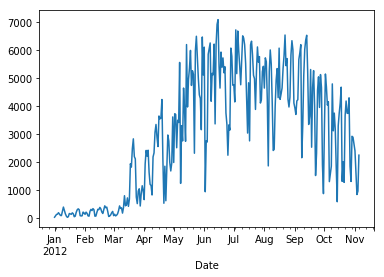

In [6]:
fixed_df['Berri 1'].plot()

Мы можем построить все столбцы так же легко.  Вы можете видеть, что он более сплющен, но все велосипедные дорожки ведут себя в основном одинаково - если это плохой день для велосипедистов, это плохой день повсюду.

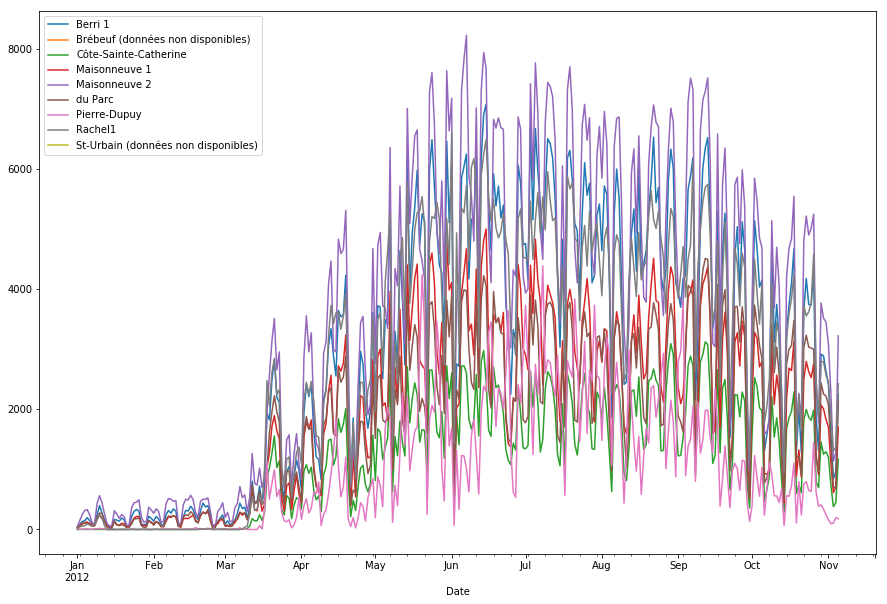

In [7]:
fixed_df.plot(figsize=(15, 10))

## 1.4 Собираем все это вместе

Вот код, который нам нужно было написать, нарисуйте этот график, все вместе:

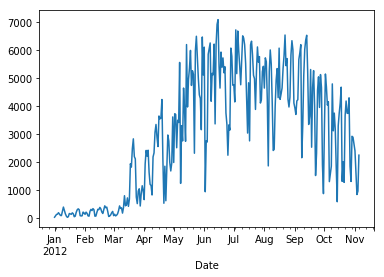

In [8]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()
# fixed_df.plot(figsize=(15, 10))

# Часть 2
### Выбор данных и поиск наиболее распространенного типа жалобы

In [9]:
# Немного поэкспериминтируем над опциями
# Это необходимо, чтобы показать много столбцов 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Здесь мы будем использовать новый набор данных, чтобы продемонстрировать, как работать с большими наборами данных. Это подмножество из 311 запросов на обслуживание от NYC Open Data.

In [10]:
complaints = pd.read_csv('data/311-service-requests.csv')

c:\python37-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


В зависимости от версии pandas может появиться ошибка типа "DtypeWarning: столбцы (8) имеют смешанные типы". Это означает, что возникла проблема с чтением наших данных. В этом случае это почти наверняка означает, что у него есть столбцы, где некоторые из записей являются строками, а некоторые целыми числами.

На данный момент мы проигнорируем его и надеемся, что не столкнемся с проблемой, но в долгосрочной перспективе нам нужно будет изучить это предупреждение.

## 2.1 Что в нем вообще находится? (резюме)

При печати большого фрейма данных отображаются только первые несколько строк.
Но мы немного изменили настройки pandas

In [11]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

## 2.2 Выбор столбцов и строк

Чтобы выбрать столбец, мы индексируем его имя следующим образом:

In [12]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

Чтобы получить первые 5 строк фрейма данных, мы можем использовать срез: df \[: 5\]. Или использовать метод .head(5) но он дает срез только с первой строки.

Это отличный способ получить представление о том, какая информация содержится в фрейме данных - найдите минутку, чтобы просмотреть содержимое и получить представление об этом наборе данных.

In [13]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Мы можем объединить их, чтобы получить первые 5 строк столбца:

In [14]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

и не имеет значения, в каком направлении мы это делаем:

In [15]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

## 2.3 Выбор нескольких столбцов

Что, если мы просто хотим знать тип жалобы и район, но не остальную информацию? Pandas позволяет очень легко выбрать подмножество столбцов: просто индексируйте со списком столбцов, которые вы хотите.

In [16]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


и мы можем посмотреть на первые 10 строк:

In [17]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


## 2.4 Какой тип жалобы наиболее распространен?

Это очень простой вопрос! Есть `.value_counts ()` метод, который мы можем использовать:

In [18]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Consumer Complaint                

Если мы просто хотели топ-10 наиболее распространенных жалоб, мы можем сделать это:

In [19]:
complaints['Complaint Type'].value_counts()[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [20]:
complaint_counts = complaints['Complaint Type'].value_counts()

Мы можем их нарисовать!

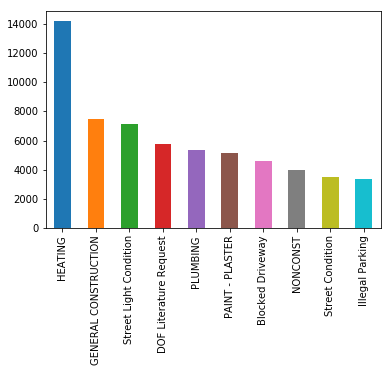

In [21]:
complaint_counts[:10].plot(kind='bar') # в данном случаи мы выбрали тип отображения

# Часть 3
### Какой район имеет наибольшее количество жалоб на шум (или, более отборные данные)

In [22]:
# Добавим библиотеку numpy
import numpy as np

Давайте продолжим с нашим примером запросов на обслуживание NYC 311.

## 3.1 Выбор только жалоб на шум

Я хотел бы знать, в каком районе больше всего жалоб на шум. Сначала мы рассмотрим данные, чтобы увидеть, как они выглядят:

In [23]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Чтобы получить жалобы на шум, нам нужно найти строки, в которых столбец "тип жалобы" является "шум - улица/тротуар". Я покажу вам, как это сделать, а затем объясню, что происходит.

In [24]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


Если вы посмотрите на `noise_complaints`, вы увидите, что это сработало, и он содержит только жалобы с правильным типом жалобы. Но как это работает? Давайте разобьем его на две части

In [25]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Le

Это большой массив Trues и Falses, по одному для каждой строки в нашем фрейме данных. Когда мы индексируем наш dataframe с этим массивом, мы получаем только строки, где наш логический массив оценивается как True. Важно отметить, что для фильтрации строк по логическому массиву длина индекса нашего фрейма данных должна совпадать с длиной логического массива, используемого для фильтрации.

Можно также объединить несколько условий с оператором & следующим образом:

In [26]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895.0,171051.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144.0,173511.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Или, если бы мы просто хотели несколько столбцов:

In [27]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


## 3.2 Отступление о массивах numpy

Внутри столбец имеет тип pd.Series

In [28]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

как мы видим это numpy массивы. Если добавить .values в конце любого Series, вы получите его внутренний массив numpy

In [29]:
np.array([1,2,3])

array([1, 2, 3])

In [30]:
pd.Series([1,2,3]).values

array([1, 2, 3], dtype=int64)

Таким образом, этот выбор двоичных массивов на самом деле работает с любым массивом numpy:

In [31]:
arr = np.array([1,2,3])

In [32]:
arr != 2

array([ True, False,  True])

In [33]:
arr[arr != 2]

array([1, 3])

## 3.3 Итак, в каком районе больше всего жалоб на шум?

In [34]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

Это Манхэттен! Но что, если бы мы хотели разделить на общее количество жалоб, чтобы это имело немного больше смысла? Это тоже было бы легко:

In [35]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [36]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

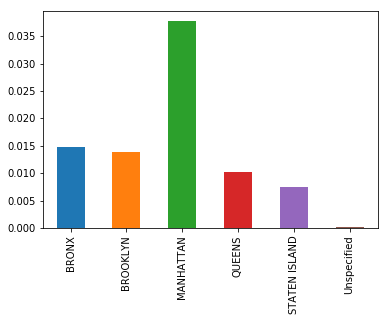

In [37]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

# Часть 4
### Узнайте, в какой день недели больше всего катаются на велосипеде

Окей! Мы возвращаемся к нашему набору данных велосипедных дорожек. Мне было любопытно люди ездят на велосипеде больше по выходным или по будням?

## 4.1 Добавление столбца "weekday" в наш фрейм данных

Мы просто посмотрим на велосипедную дорожку Берри. Берри - улица в Монреале.

In [38]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
berri_bikes = bikes[['Berri 1']].copy()

Затем нам нужно добавить столбец "будний день". Во-первых, мы можем получить будний день из индекса. Мы еще не говорили об индексах, но индекс-это то, что слева в приведенном выше фрейме данных в разделе "дата". Это в основном все дни года.

In [39]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

Вы можете видеть, что на самом деле некоторые дни отсутствуют-только 310 дней в году на самом деле есть. Кто знает, почему?

Панды имеет множество замечательных функций временных рядов, так что если мы хотели получить день месяца для каждой строки, мы могли бы сделать

In [40]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

Мы действительно хотим будний день, хотя

In [41]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

Это дни недели, где 0-понедельник.

Теперь, когда мы знаем, как получить будний день, мы можем добавить его в качестве столбца в наш фрейм данных, как это:

In [42]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 4.2 Сложение по дням недели

Это оказывается очень просто!

Таблицы данных есть .groupby() метод, который похож на SQL groupby, если вы знакомы с этим.

В данном случае, berri_bikes.groupby ("будний день").aggregate (sum) означает "сгруппировать строки по дням недели, а затем сложить все значения с одним и тем же днем недели".

In [43]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


Трудно вспомнить, что 0, 1, 2, 3, 4, 5, 6 значит, мы можем все исправить и построить график.:

In [44]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


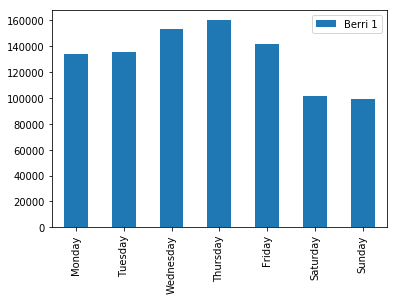

In [45]:
weekday_counts.plot(kind='bar')

## 4.3 Собираем все вместе

Давайте сложим все это вместе, чтобы доказать, насколько это легко. 6 строк кода волшебных pandas!

Если вы хотите поиграть, попробуйте изменить сумму на max, numpy.медиана, или любая другая функция, которая вам нравится.

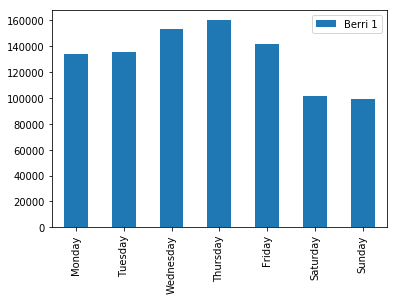

In [46]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

# Часть 5
### Объединение кадров данных и очистка данных о погоде в Канаде

Резюме

К концу этой главы мы загрузим все метеорологические данные Канады за 2012 год и сохраним их в формате CSV.

Мы сделаем это, загрузив его один месяц за раз, а затем объединив все месяцы вместе.

Вот температура каждый час в течение 2012 года!

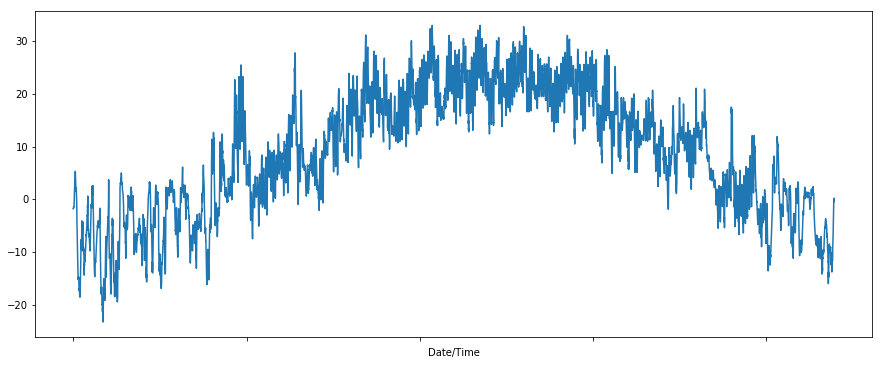

In [47]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## 5.1 Загрузка данных о погоде за один месяц

Когда я играл с данными о велосипедах, мне нужны были данные о температуре и осадках, чтобы узнать, любят ли люди велосипед, когда идет дождь. Поэтому я пошел на сайт для канадских исторических данных о погоде и выяснил, как получить его автоматически.

Здесь мы собираемся получить данные за март 2012 года и очистить его

Вот шаблон URL, который вы можете использовать для получения данных в Монреале.

In [48]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Чтобы получить данные за март 2012 года, нам нужно отформатировать их в month=3, year=2012.

In [49]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1')

In [50]:
weather_mar2012

,Year,Month,Day,Time,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,-5.5,NaN,-9.7,NaN,72,NaN,5.0,NaN,24,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,-5.7,NaN,-8.7,NaN,79,NaN,6.0,NaN,26,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,-5.4,NaN,-8.3,NaN,80,NaN,5.0,NaN,28,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,-4.7,NaN,-7.7,NaN,79,NaN,5.0,NaN,28,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,-5.4,NaN,-7.8,NaN,83,NaN,5.0,NaN,35,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 05:00:00,2012,3,1,05:00,-5.3,NaN,-7.9,NaN,82,NaN,4.0,NaN,33,NaN,2.4,NaN,100.58,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 06:00:00,2012,3,1,06:00,-5.2,NaN,-7.8,NaN,82,NaN,5.0,NaN,33,NaN,4.0,NaN,100.57,NaN,NaN,NaN,-14.0,NaN,Snow
2012-03-01 07:00:00,2012,3,1,07:00,-4.9,NaN,-7.4,NaN,83,NaN,5.0,NaN,30,NaN,1.6,NaN,100.59,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 08:00:00,2012,3,1,08:00,-5.0,NaN,-7.5,NaN,83,NaN,5.0,NaN,32,NaN,1.2,NaN,100.59,NaN,NaN,NaN,-13.0,NaN,Snow


Это здорово! Мы можем использовать read_csv, как и раньше, и просто использовать URL как имя файла.

В начале файла 16 строк метаданных, но pandas знает, что CSV могут быть странными, поэтому у read_csv есть опция skiprows. Мы снова обрабатываем даты, и устанавливаем 'Date/Time' в качестве индекса. Это получившийся dataframe

Построим график температуры!

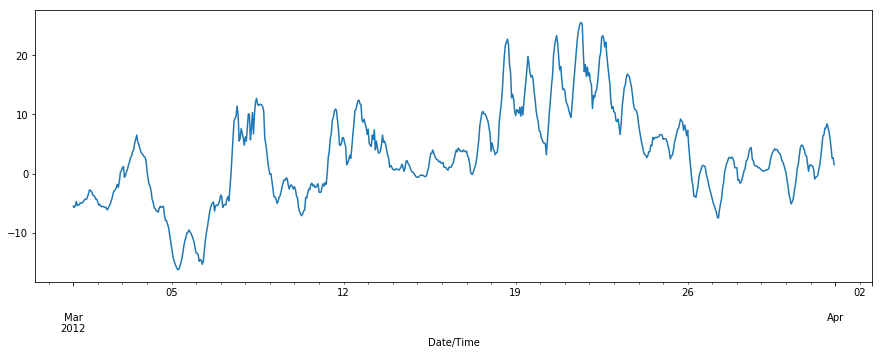

In [51]:
weather_mar2012["Temp (Â°C)"].plot(figsize=(15, 5))

Давайте исправим названия некоторых столбцов (согласитесь, не очень удобен столбец "Temp (Â°C)").

In [52]:
weather_mar2012.head(1)

,Year,Month,Day,Time,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01,2012,3,1,00:00,-5.5,NaN,-9.7,NaN,72,NaN,5.0,NaN,24,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow


In [53]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

Есть много столбцов, которые почти полностью пусты. Давайте удалим их с помощью функции dropna.

Аргумент axis=1 у dropna означает "удалить столбцы, а не строки", и how='any' означает "удалить столбец, если хотя бы одно значение пусто".

Сейчас гораздо лучше - у нас только столбцы с реальными данными.

In [54]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Year,Month,Day,Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Столбцы Year/Month/Day/Time лишние. Удалим их.

axis=1 означает "удалить столбцы", как и раньше. По умолчанию dropna и drop всегда удаляют строки (axis=0).

In [55]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
weather_mar2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Здорово! Теперь проще работать с этими данными.

## 5.2 Дневной график температуры

Просто так - мы этим уже занимались в предыдущей части. Но давайте сделаем это.

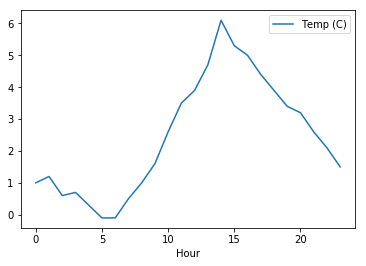

In [56]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

Наибольшая температура (по медиане) приходится на 2 часа дня. Неплохо.

## 5.3 Получаем данные за год

Как теперь получить данные за весь год? В идеале, сайт должен предоставлять такую возможность, но на практике такой возможности нет.

Во-первых, у нас есть функция, получающая данные за месяц:

In [57]:
def download_weather_month(year, month): # объединили все что до этого сделали
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1')
    weather_data.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']
    weather_data = weather_data.dropna(axis=1, how='any')
    weather_data = weather_data.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
    return weather_data

Проверим, что функция работает верно:

In [58]:
download_weather_month(2012, 1)[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Теперь объединим все месяцы. Получим их:

In [59]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Объединим dataframe с помощью pd.concat. Теперь у нас данные за весь год!

In [60]:
weather_2012 = pd.concat(data_by_month)
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


## 5.4 Сохранить dataframe в CSV файл

Вы заметили, что функция download_weather_month выполняется медленно? Не стоит каждый раз загружать эти данные, поэтому сохраним результат в CSV файл.

In [61]:
weather_2012.to_csv('data/weather_2012.csv')

# Часть 6
### Ищем самый снежный месяц

Мы уже видели, что pandas хорошо умеет обращаться с датами. Но он также хорошо умеет работать со строками! Возьмём наши данные из предыдущей части.

In [62]:
weather_2012 = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## 6.1 Операции над строками в pandas

Мы видим, что столбец 'Weather' содержит текстовое описание погоды за час. Предположим, что снежная погода в описании содержит "Snow".

pandas позволяет векторизовать операции над строками, позволяя эффективно обрабатывать столбцы. В документации есть много хороших примеров.

In [63]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

Этот код даёт нам бинарный вектор

In [64]:
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

## 6.2 Находим снежные месяцы

Если мы хотим медианную температуру за каждый месяц, нужно использовать метод resample(), как в примере:

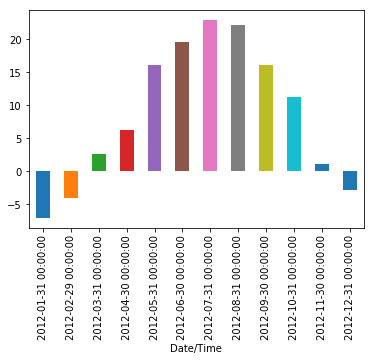

In [65]:
weather_2012['Temp (C)'].resample('M').median().plot(kind='bar')

Внезапно, июль и август оказались самыми тёплыми.

Что касается снега, можно считать, что мы имеем дело с векторами из нулей и единиц, вместо True и False:

In [66]:
is_snowing.astype(int)[:10]

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
2012-01-01 05:00:00    0
2012-01-01 06:00:00    0
2012-01-01 07:00:00    0
2012-01-01 08:00:00    0
2012-01-01 09:00:00    0
Name: Weather, dtype: int32

а затем использовать resample, чтобы найти процент времени, когда шёл снег.

In [67]:
is_snowing.astype(int).resample('M').mean()

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

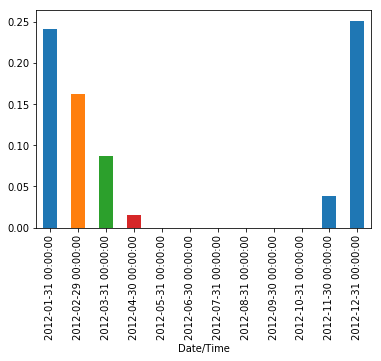

In [68]:
is_snowing.astype(int).resample('M').mean().plot(kind='bar')

Теперь мы знаем! В 2012, декабрь был самым снежным месяцем.

## 6.2 Строим графики температур и снежности вместе

Также можно объединить эти 2 статистики в один DataFrame и построить их графики вместе:

In [69]:
temperature = weather_2012['Temp (C)'].resample('M').median()
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(int).resample('M').mean()

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

Снова используем concat, чтобы объединить колонки в один DataFrame.

In [70]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


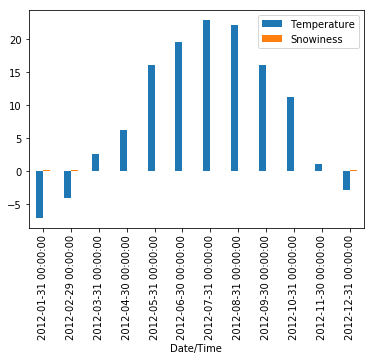

In [71]:
stats.plot(kind='bar')

Ох, это не работает, потому что масштаб выбран неправильно. Лучше построим их на двух разных графиках:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13392F70>,
      dtype=object)

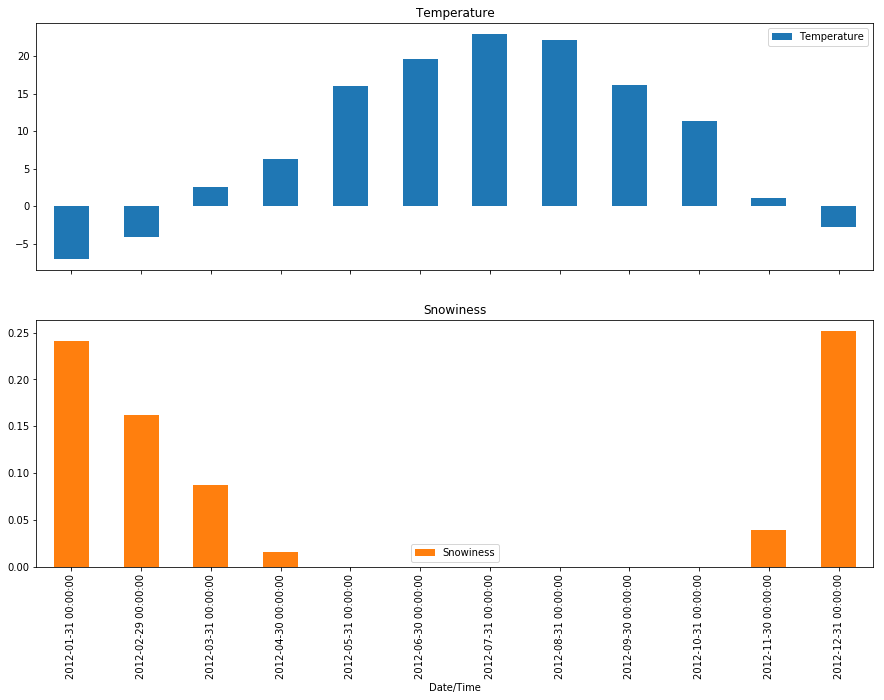

In [72]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

# Часть 7
### работа с загрязненными данными

Главная проблема загрязненных данных: понять, они загрязнены или нет?

Используем данные NYC 311 service request из одной из прошлых статей, так как их много и они неочевидны.

In [73]:
requests = pd.read_csv('data/311-service-requests.csv')

c:\python37-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 7.1 Как узнать, что данные загрязнены?

Посмотрим на некоторые колонки. Есть некоторые проблемы с zip code, поэтому посмотрим сначала на него.

Чтобы предположить, есть ли в колонке проблема, можно использовать .unique() для просмотра всех значений. Если это численные данные, вместо этого можно построить гистограмму значений, чтобы понять распределение данных.

Когда мы посмторим на уникальные значения в "Incident Zip", станет сразу ясно, что это мусор. Некоторые проблемы:

Некоторые значения - строки, некоторые - числа
- Есть nan
- Некоторые значения 29616-0759 или 83
- Некоторые неопределённые значения, которые pandas не смог распознать, такие как 'N/A' и 'NO CLUE'

Что можно сделать:
- Преобразовать 'N/A' и 'NO CLUE' в обычные nan
- Посмотреть, что такое 83, и решить, что же делать
- Сделать все строками

In [74]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

## 7.2 Исправление ошибок с NAN и различий строки/числа

Можно передать na_values в pd.read_csv, чтобы немного очистить данные. Также можно явно указать тип для Incident Zip.

In [75]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [76]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

## 7.3 Что с дефисами?

In [77]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

In [78]:
requests[rows_with_dashes]['Incident Zip']

29136    77092-2016
30939    55164-0737
70539    11549-3650
85821    29616-0759
89304    35209-3114
Name: Incident Zip, dtype: object

Сначала родилось предположение о том, что это пропущенные данные, и эти строки нужно удалить:

requests\['Incident Zip'\]\[rows_with_dashes\] = np.nan

Но оказалось, что zip code из 9 цифр - это норма. Посмотрим на них, поймём, всё ли правильно, и обрежем их.

In [79]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [80]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

Было предположение, что 00083 - это неверный zip code, но оказалось, что он принадлежит Central Park! Посмотрим на код 00000:

In [81]:
requests[requests['Incident Zip'] == '00000']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,EWR,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/07/2013 09:53:51 AM,10/23/2013 09:54:43 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,NEWARK AIRPORT,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/02/2013 11:59:46 AM,10/18/2013 12:01:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выглядит удручающе. Заменим на nan.

In [82]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan

Посмотрим, чего мы добились:

In [83]:
unique_zips = requests['Incident Zip'].unique()
unique_zips

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

Здорово! Гораздо чище. Хотя немного странно: zip code 77056, согласно Google maps, принадлежит Техасу.

Посмотрим поближе:

In [84]:
zips = requests['Incident Zip']
# Let's say the zips starting with '0' and '1' are okay, for now. (this isn't actually true -- 13221 is in Syracuse, and why?)
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# There are a bunch of NaNs, but we're not interested in them right now, so we'll say they're False
is_far = ~(is_close) & zips.notnull()

In [85]:
zips[is_far]

12102    77056
13450    70711
29136    77092
30939    55164
44008    90010
47048    23541
57636    92123
71001    92123
71834    23502
80573    61702
85821    29616
89304    35209
94201    41042
Name: Incident Zip, dtype: object

In [86]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort_values('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616,Debt Not Owed,GREENVILLE
89304,35209,Harassment,BIRMINGHAM
94201,41042,Harassment,FLORENCE
30939,55164,Harassment,ST. PAUL
80573,61702,Billing Dispute,BLOOMIGTON
13450,70711,Contract Dispute,CLIFTON
12102,77056,Debt Not Owed,HOUSTON
29136,77092,False Advertising,HOUSTON


О, Лос Анджелес! Фильтрация по zip code не лучший путь для обработки таких ситуаций - гораздо лучше сразу посмотреть на город.

In [87]:
requests['City'].str.upper().value_counts()

BROOKLYN                  31662
NEW YORK                  22664
BRONX                     18438
STATEN ISLAND              4766
JAMAICA                    2246
FLUSHING                   1803
ASTORIA                    1568
RIDGEWOOD                  1073
CORONA                      707
OZONE PARK                  693
LONG ISLAND CITY            678
FAR ROCKAWAY                652
ELMHURST                    647
WOODSIDE                    609
EAST ELMHURST               562
QUEENS VILLAGE              549
JACKSON HEIGHTS             541
FOREST HILLS                541
SOUTH RICHMOND HILL         521
MASPETH                     473
WOODHAVEN                   464
FRESH MEADOWS               435
SPRINGFIELD GARDENS         434
BAYSIDE                     411
SOUTH OZONE PARK            410
RICHMOND HILL               404
REGO PARK                   402
MIDDLE VILLAGE              396
SAINT ALBANS                387
WHITESTONE                  348
                          ...  
LYNBROOK

# Часть 8
### работа с датами и временем

Часто данные содержат не только числовые или строковые значения, но и даты / время, причём в огромном множестве разных форматов. pandas умеет работать с датами; в этой части будет показано, как.

## 8.1 Unix timestamps

Самый распространённый формат в Unix. Неочевидно, что делать с Unix timestamp в pandas. Файл, который мы будем использовать - "popularity-contest", найденный в папке /var/log/popularity-contest. Что это за файл?


In [88]:
# Read it, and remove the last row
popcon = pd.read_csv('data/popularity-contest', sep=' ')[:-1]
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']

In [89]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


Магия в обработке timestamp в pandas в том, что numpy datetime сохраняются, как Unix timestamp. Поэтому всё, что нам нужно - это сказать pandas, что эти целые числа - это datetimes - они не требуют каких-либо преобразований.

Сначала преобразуем в целые числа:

In [90]:
popcon['atime'] = popcon['atime'].astype(int)
popcon['ctime'] = popcon['ctime'].astype(int)

Каждый массив numpy и pandas series имеют тип (dtype) - обычно это int64, float64, или object. Некоторые типы времени доступны как datetime64\[s\], datetime64\[ms\], и datetime64\[us\]. Также есть тип timedelta.

Мы можем использовать функцию pd.to_datetime для преобразования чисел в datetime. Это не требует времени - мы не изменяем данные, а говорим pandas о том, что они означают.

In [91]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit='s')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit='s')

Посмотрим на dtype, он . M8 это секретный код для datetime64.

In [92]:
popcon['atime'].dtype

dtype('<M8[ns]')

Посмотрим на atime и ctime как на даты!

In [93]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


Теперь посмотрим на все пакеты, которые не являются библиотеками.

Сначала, посмотрим на всё с timestamp 0. Заметили, что мы можем использовать строку для сравнения, несмотря на то, что внутри находится timestamp? Поэтому pandas крут.

In [94]:
popcon = popcon[popcon['atime'] > '1970-01-01']

Теперь можно использовать магические способности pandas для строк, чтобы посмотреть, где имя пакета не содержит 'lib'.

In [95]:
nonlibraries = popcon[~popcon['package-name'].str.contains('lib')]

In [96]:
nonlibraries.sort_values('ctime', ascending=False)[:10]

,atime,ctime,package-name,mru-program,tag
57,2013-12-17 04:55:39,2013-12-17 04:55:42,ddd,/usr/bin/ddd,<RECENT-CTIME>
450,2013-12-16 20:03:20,2013-12-16 20:05:13,nodejs,/usr/bin/npm,<RECENT-CTIME>
454,2013-12-16 20:03:20,2013-12-16 20:05:04,switchboard-plug-keyboard,/usr/lib/plugs/pantheon/keyboard/options.txt,<RECENT-CTIME>
445,2013-12-16 20:03:20,2013-12-16 20:05:04,thunderbird-locale-en,/usr/lib/thunderbird-addons/extensions/langpac...,<RECENT-CTIME>
396,2013-12-16 20:08:27,2013-12-16 20:05:03,software-center,/usr/sbin/update-software-center,<RECENT-CTIME>
449,2013-12-16 20:03:20,2013-12-16 20:05:00,samba-common-bin,/usr/bin/net.samba3,<RECENT-CTIME>
397,2013-12-16 20:08:25,2013-12-16 20:04:59,postgresql-client-9.1,/usr/lib/postgresql/9.1/bin/psql,<RECENT-CTIME>
398,2013-12-16 20:08:23,2013-12-16 20:04:58,postgresql-9.1,/usr/lib/postgresql/9.1/bin/postmaster,<RECENT-CTIME>
452,2013-12-16 20:03:20,2013-12-16 20:04:55,php5-dev,/usr/include/php5/main/snprintf.h,<RECENT-CTIME>
440,2013-12-16 20:03:20,2013-12-16 20:04:54,php-pear,/usr/share/php/XML/Util.php,<RECENT-CTIME>


Замечательно, это говорит о том, что установлен ddd. И postgresql!

# Часть 9
### Работа с данными из базы данных SQL

До этого момента, мы получали данные только из csv файлов. Это довольно распространённый способ сохранения данных, но далеко не единственный! Pandas может работать с данными из HTML, JSON, SQL, Excel (!!!), HDF5, Stata, и некоторых других вещей. В этой части мы поговорим о работе с данными из баз данных SQL.

In [97]:
import sqlite3

## 9.1 Чтение из SQL баз данных

Загрузить данные из SQL базы можно с помощью функции pd.read_sql. read_sql автоматически преобразует столбцы SQL в столбцы DataFrame.

read_sql принимает 2 аргумента: запрос SELECT, и connection. Это здорово, так как это означает, что можно читать из любого вида базы данных - неважно, MySQL, SQLite, PostgreSQL, или другая.

В этом примере мы читаем из базы SQLite, но другие читаются точно также. Файл, с которым мы будем работать.

In [99]:
con = sqlite3.connect("data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8


read_sql не устанавливает первичный ключ (id) в качестве индекса. Можно это сделать вручную, добавив аргумент index_col к read_sql.

Если вы много использовали read_csv, вы могли заметить, что у него также есть аргумент index_col. И ведёт он себя точно так же.

In [100]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, index_col='id')
df

,date_time,temp
id,,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


Если вы хотите, чтобы dataframe был индексирован несколькими столбцами, в index_col можно указать их список:

In [101]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, 
                 index_col=['id', 'date_time'])
df

,,temp
id,date_time,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


## 9.2 Запись в базу

Запись производится с помощью метода to_sql (по аналогии с CSV):

In [102]:
weather_df = pd.read_csv('data/weather_2012.csv')
con = sqlite3.connect("data/test_db.sqlite")
con.execute("DROP TABLE IF EXISTS weather_2012")
weather_df.to_sql("weather_2012", con)

c:\python37-32\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


Теперь мы можем загрузить записанные данные:

In [103]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


Главное преимущество хранения данных в базе в том, что можно напрямую делать SQL запросы. Это особенно хорошо, если SQL для вас более родной язык. Например, можно отсортировать по колонке 'Weather' с помощью лишь SQL:

In [104]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 ORDER BY Weather LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
1,114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2,115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear


## 9.3 Другие базы данных

Для подключения к MySQL:

Чтобы это работало, у вас на машине должна быть установлена соответствующая база данных

In [105]:
# for MySQL
# import MySQLdb
# con = MySQLdb.connect(host="localhost", db="test")

# for PostgreSQL 
# import psycopg2
# con = psycopg2.connect(host="localhost")